In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from pathlib import Path
import warnings
import os
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm
from PIL import Image
import random
import pandas as pd
import numpy as np
from collections import defaultdict
import cv2

warnings.simplefilter('ignore')
pd.options.display.precision = 3

In [2]:
df_train = pd.read_csv("../raw/train-metadata.csv")
df_train.head()

isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type  tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white    20.244  ...   
1                    1.10  TBP tile: close-up     3D: white    31.713  ...   
2                    3.40  TBP tile: close-up        3D: XP    22.576  ...   
3                    3.22  TBP tile: close-up        3D: XP    14.242  ...   
4                    2.73  TBP tile: close-up     3D: white    24.726  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx_5  \
0         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
1  IL_6727506     Benign  Benign     NaN     NaN     NaN     NaN   
2         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
3         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
4         NaN     Benign  Benign     NaN     NaN     NaN     NaN   

   mel_mitotic_index  mel_thick_mm  tbp_lv_dnn_lesion_confidence  
0                NaN           NaN                        97.517  
1                NaN           NaN                         3.141  
2                NaN           NaN                        99.804  
3                NaN           NaN                        99.990  
4                NaN           NaN                        70.443  

[5 rows x 55 columns]

In [3]:
TRAIN_DIR = '../raw/train-image/image'

def get_train_file_path(image_id):
    return f"{TRAIN_DIR}/{image_id}.jpg"

In [4]:
print("陽性の数:", (df_train["target"]==1).sum())

陽性の数: 393


# Positive

In [6]:
df_positive = df_train[df_train["target"] == 1]
df_positive["iddx_full"].value_counts().sort_index().iloc[:15]

iddx_full
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma                                                                        11
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Infiltrating                                     6
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular                                         98
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Superficial                                     48
Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ                                                                                   48
Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ::Squamous cell carcinoma in situ, Bowens disease                                   1
Malign

In [7]:
df_positive["iddx_full"].value_counts().sort_index().iloc[15:]

iddx_full
Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, Lentigo maligna type       12
Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, Superficial spreading      10
Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, associated with a nevus    12
Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma metastasis                                             1
Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma, NOS                                                  13
Name: count, dtype: int64

In [8]:
len(df_positive["iddx_full"].value_counts())

20

Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma
count: 11


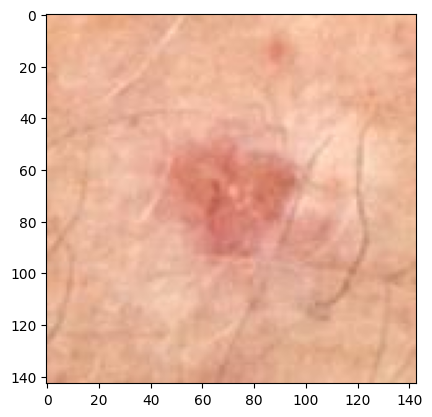

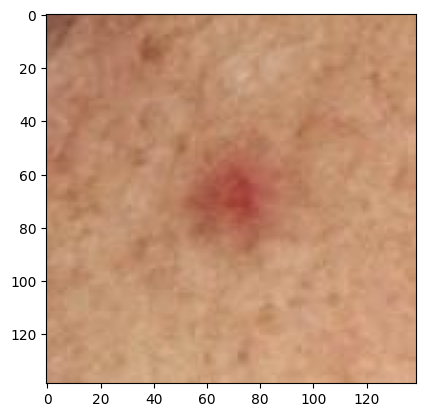

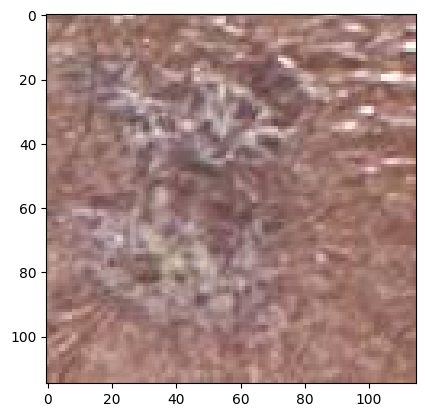

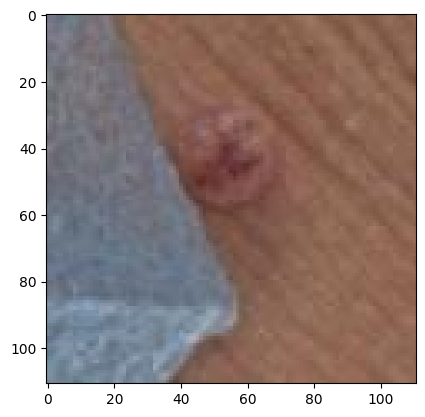

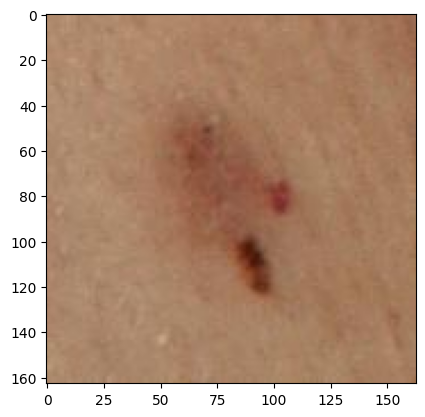

Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Infiltrating
count: 6


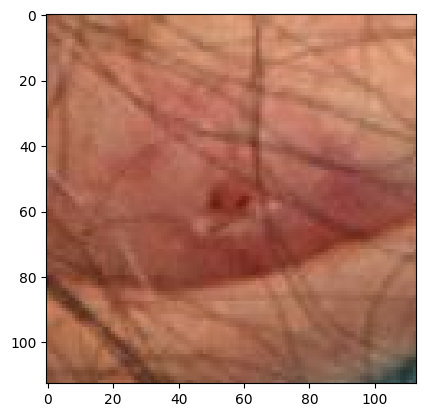

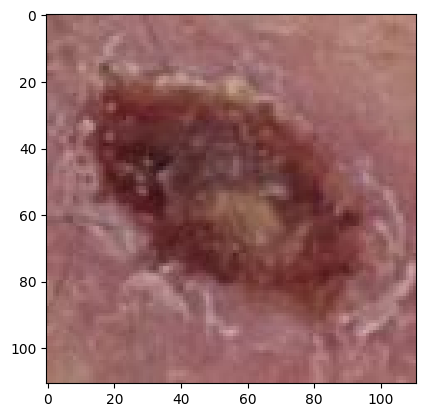

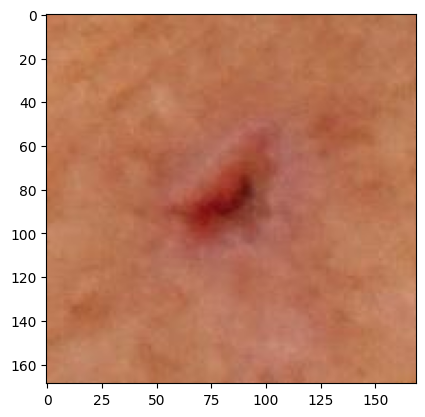

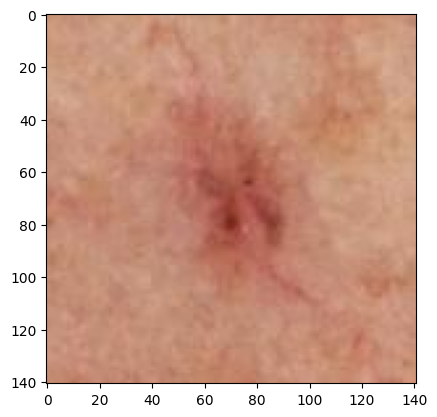

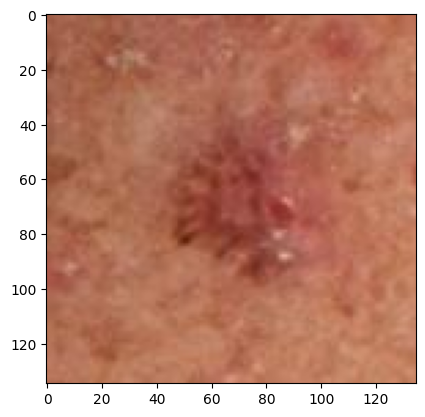

Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular
count: 98


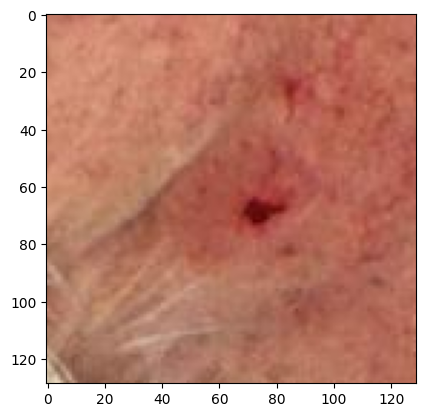

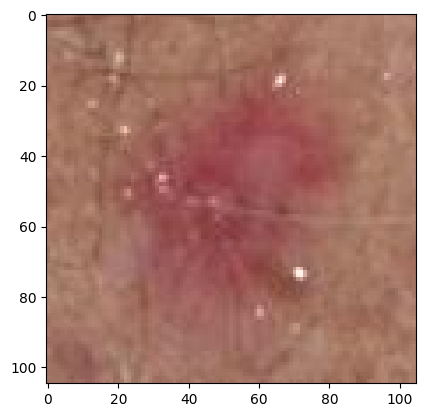

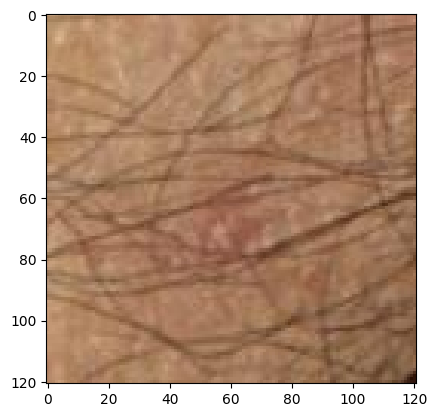

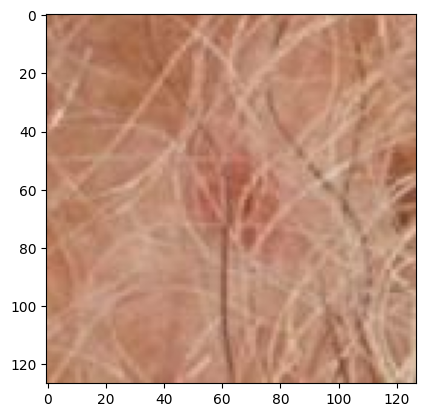

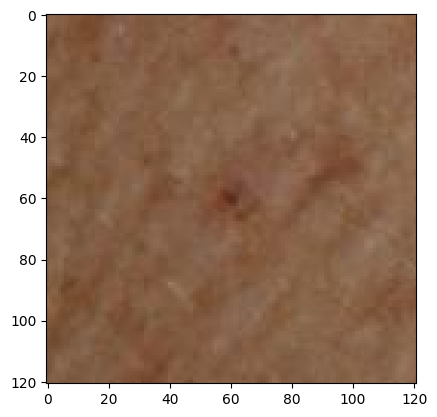

Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Superficial
count: 48


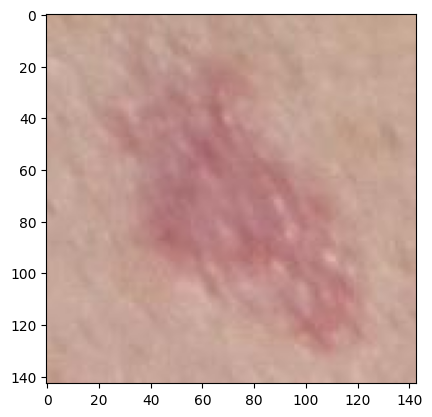

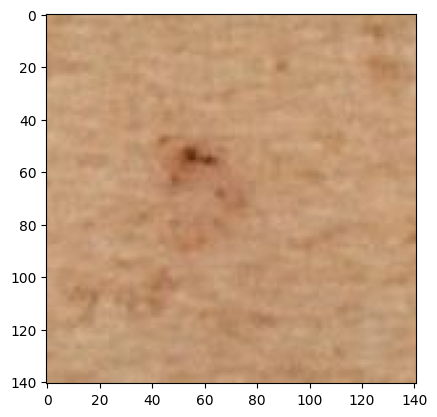

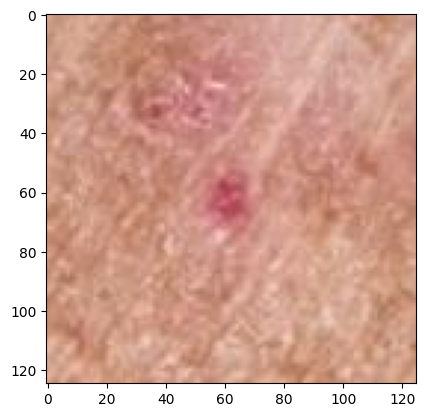

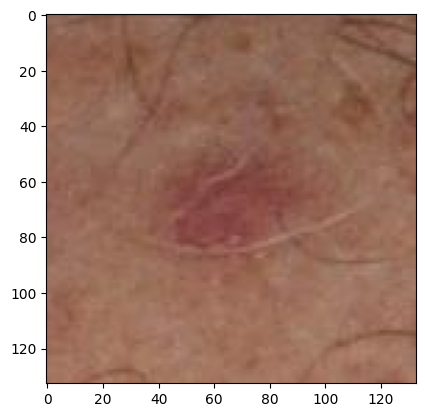

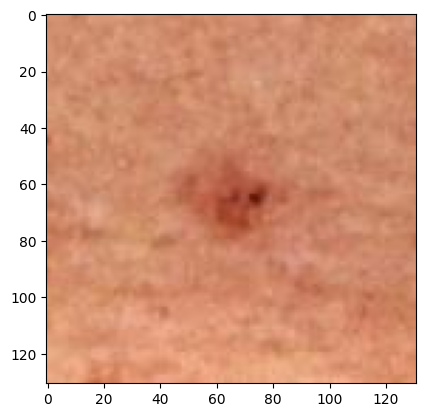

Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ
count: 48


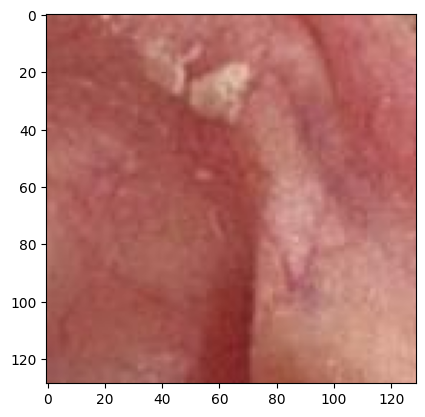

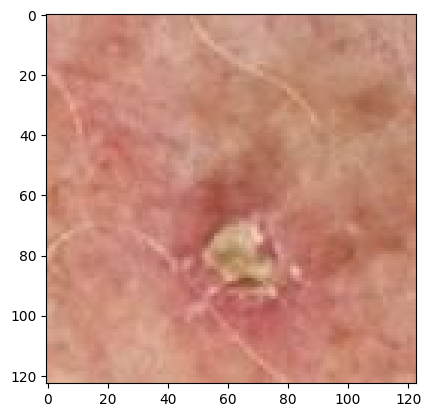

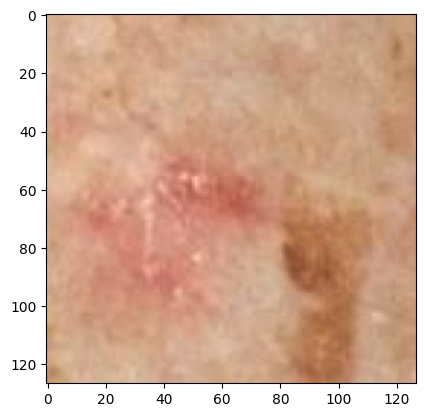

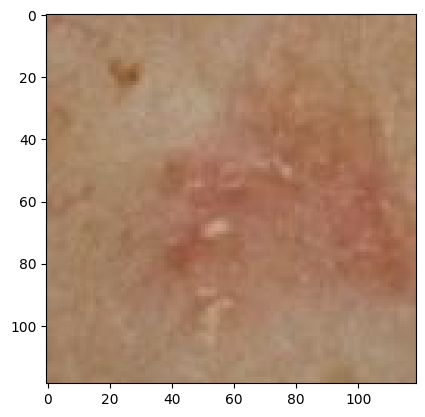

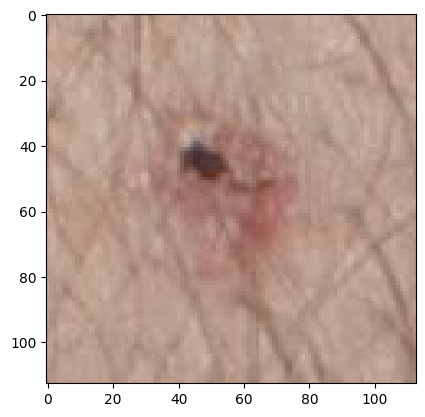

In [10]:
for iddx in sorted(df_positive["iddx_full"].unique().tolist())[:5]:
    tmp = df_positive[df_positive["iddx_full"] == iddx]
    print("==="*20)
    print(iddx)
    print("count:", len(tmp))
    if len(tmp) > 5:
        image_id_list = tmp.sample(5)["isic_id"].values
    else:
        image_id_list = tmp["isic_id"].values
    for image_id in image_id_list:
        image_path = get_train_file_path(image_id)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()


Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ::Squamous cell carcinoma in situ, Bowens disease
count: 1


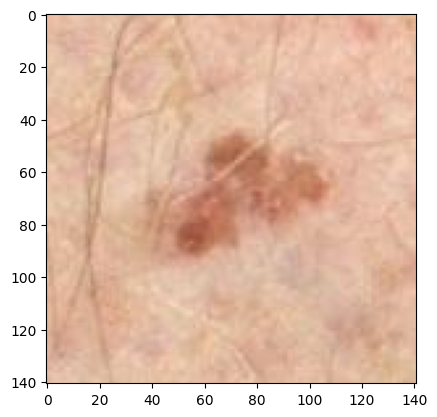

Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, Invasive
count: 17


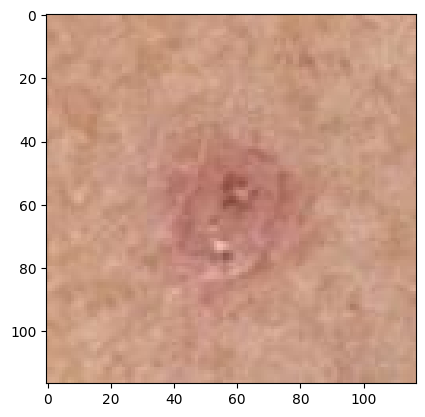

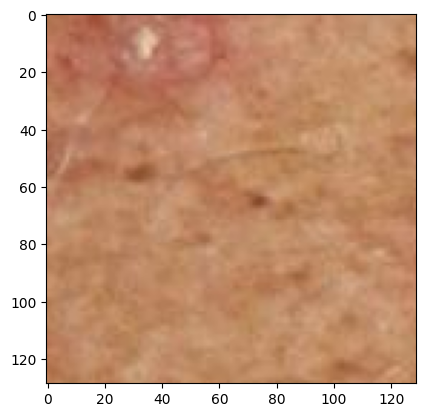

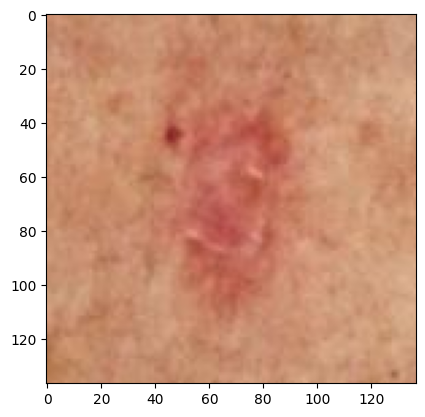

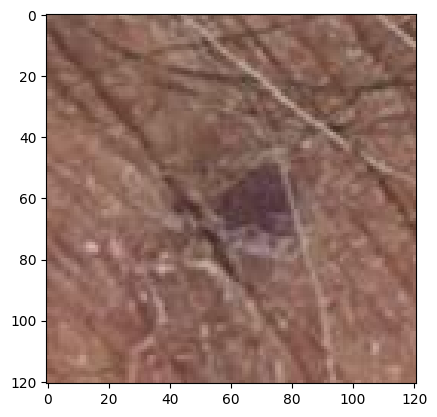

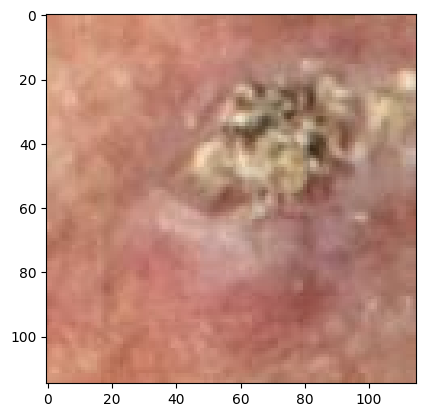

Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, Invasive::Squamous cell carcinoma, Invasive, Keratoacanthoma-type
count: 5


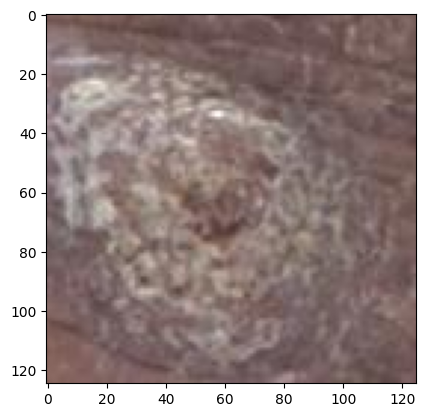

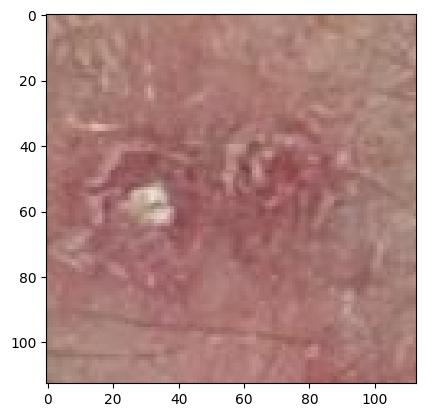

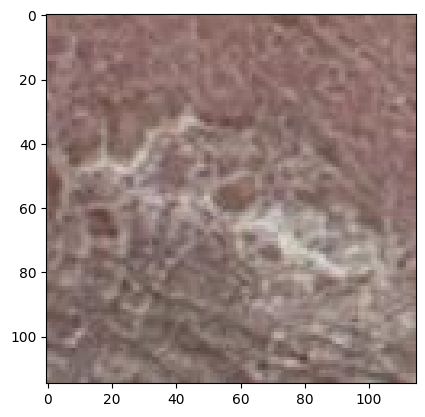

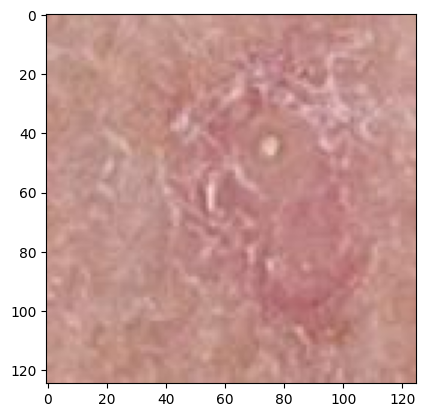

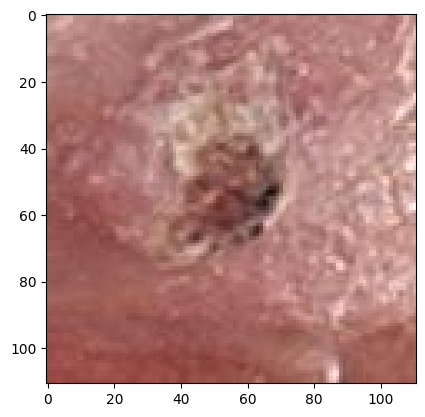

Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, NOS
count: 2


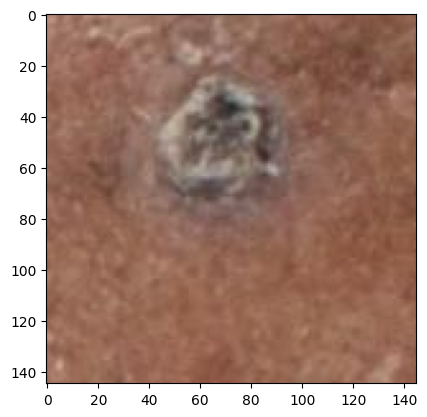

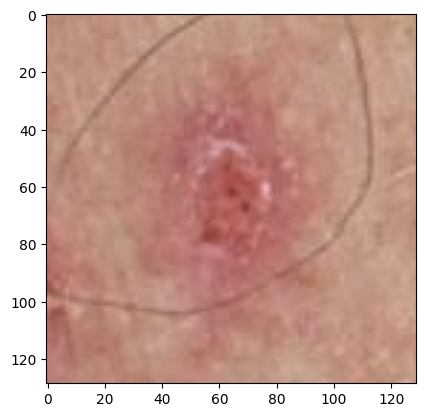

Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive
count: 13


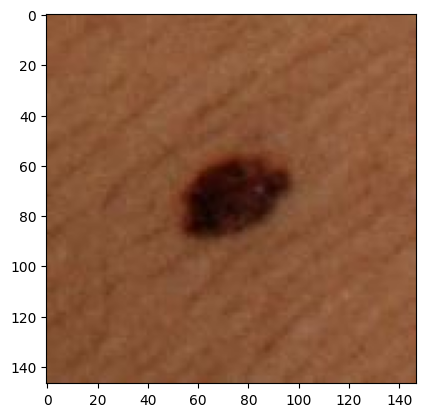

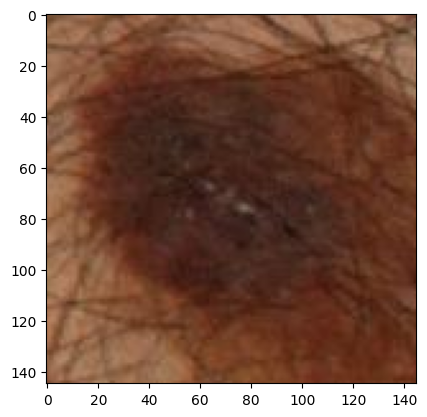

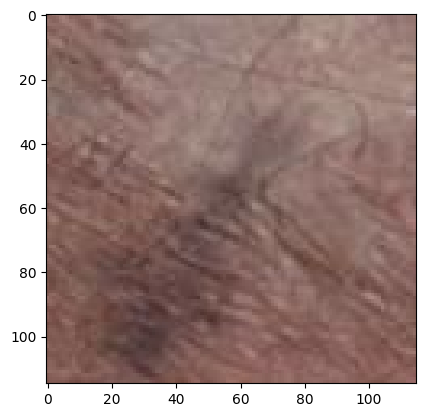

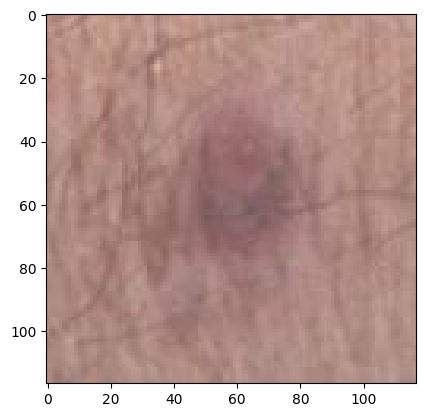

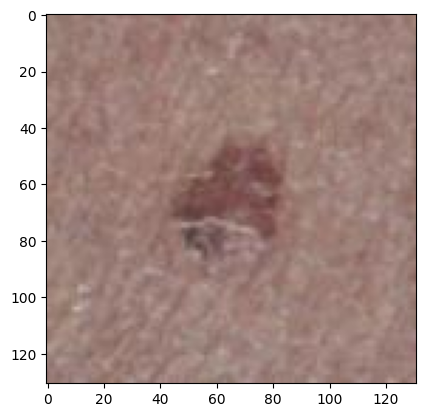

In [11]:
for iddx in sorted(df_positive["iddx_full"].unique().tolist())[5:10]:
    tmp = df_positive[df_positive["iddx_full"] == iddx]
    print("==="*20)
    print(iddx)
    print("count:", len(tmp))
    if len(tmp) > 5:
        image_id_list = tmp.sample(5)["isic_id"].values
    else:
        image_id_list = tmp["isic_id"].values
    for image_id in image_id_list:
        image_path = get_train_file_path(image_id)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()

Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Associated with a nevus
count: 7


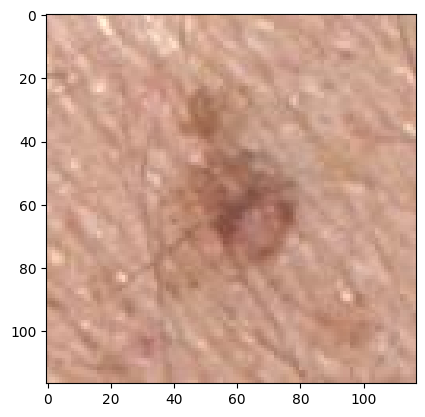

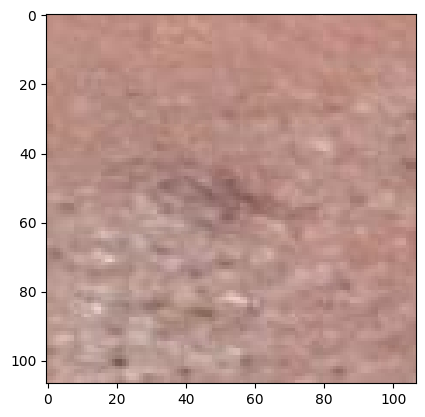

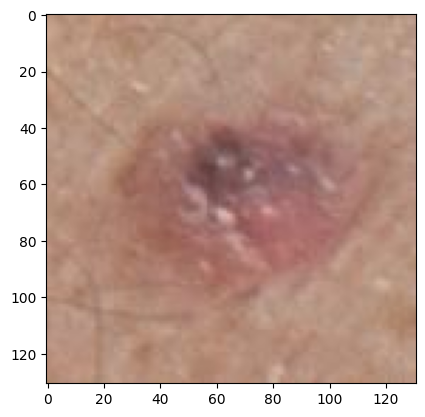

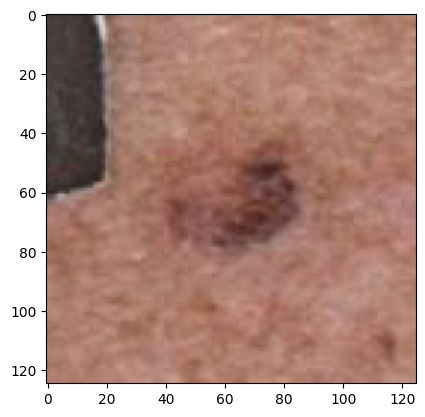

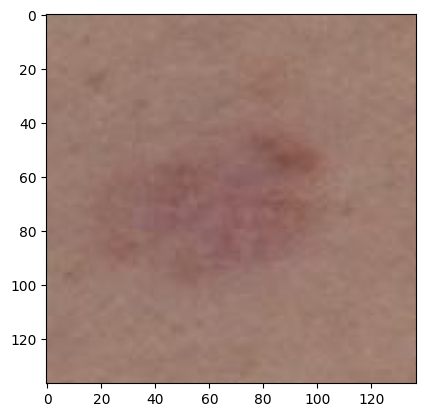

Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Nodular
count: 1


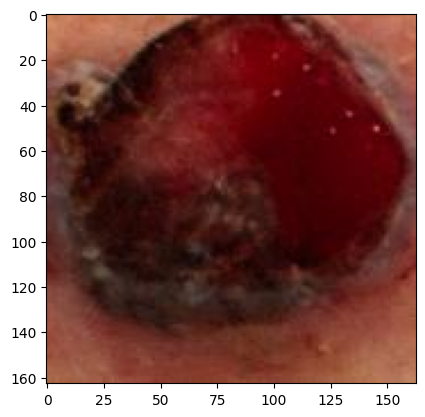

Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, On chronically sun-exposed skin or lentigo maligna melanoma
count: 5


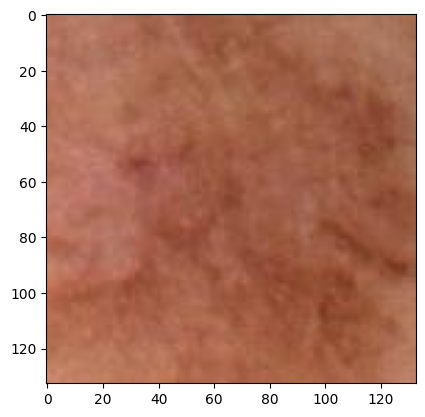

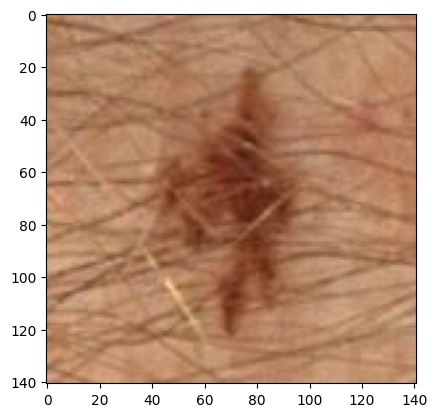

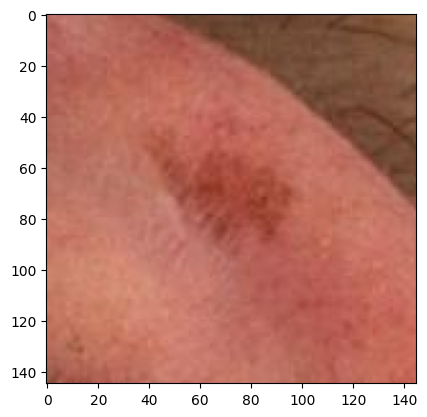

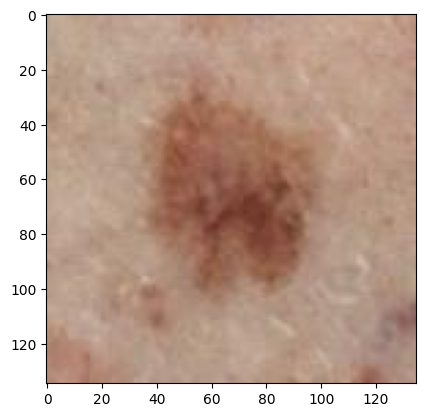

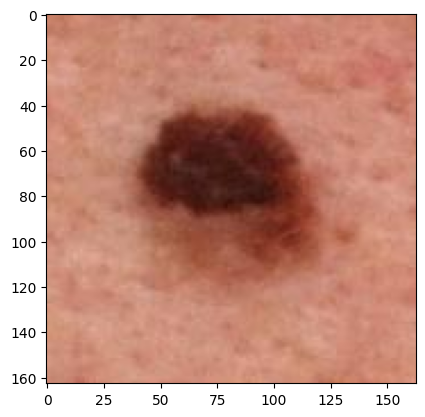

Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Superficial spreading
count: 37


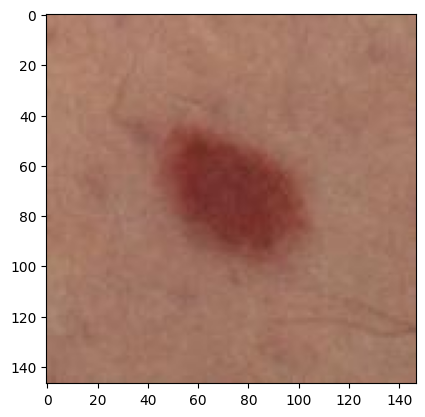

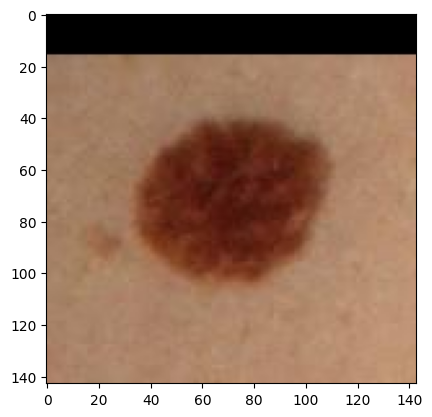

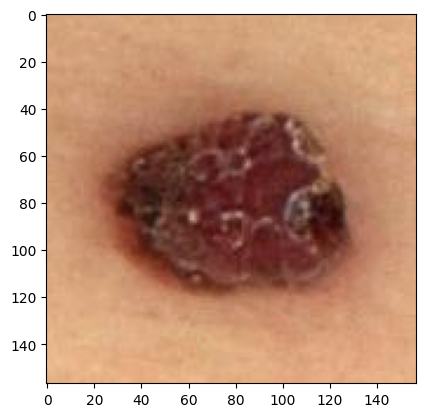

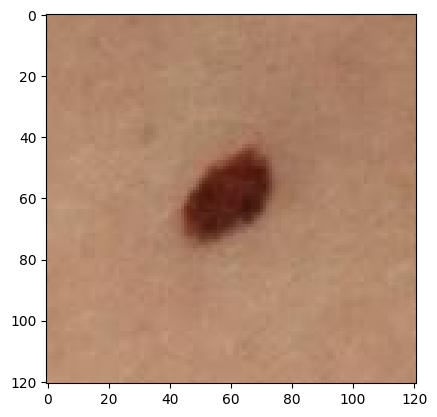

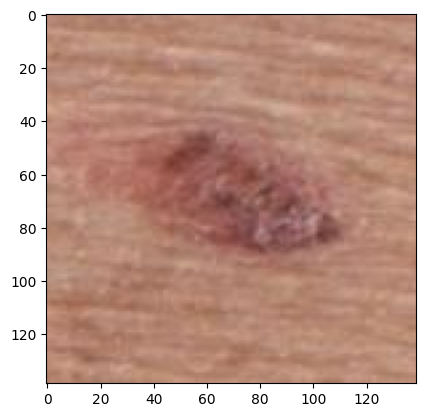

Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ
count: 46


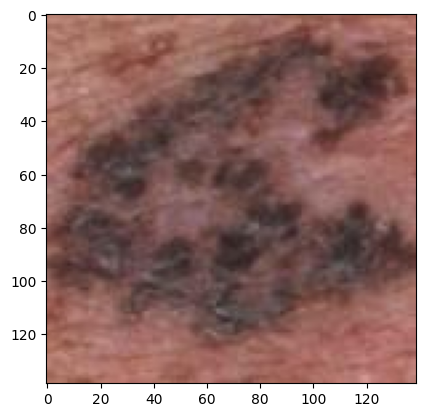

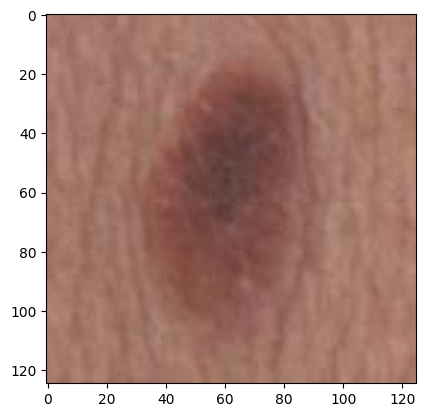

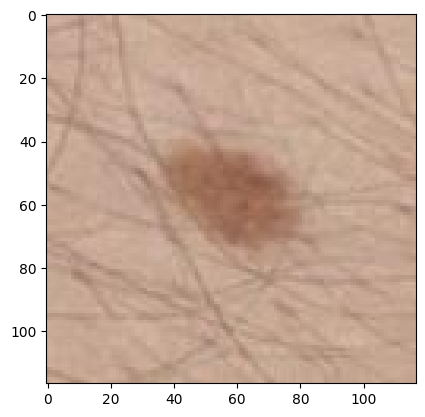

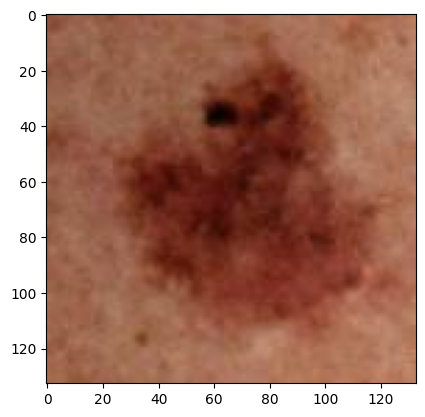

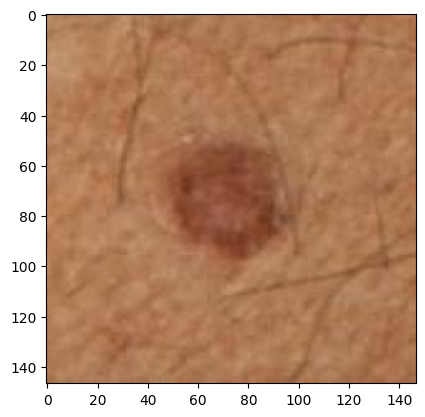

In [12]:
for iddx in sorted(df_positive["iddx_full"].unique().tolist())[10:15]:
    tmp = df_positive[df_positive["iddx_full"] == iddx]
    print("==="*20)
    print(iddx)
    print("count:", len(tmp))
    if len(tmp) > 5:
        image_id_list = tmp.sample(5)["isic_id"].values
    else:
        image_id_list = tmp["isic_id"].values
    for image_id in image_id_list:
        image_path = get_train_file_path(image_id)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()

Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, Lentigo maligna type
count: 12


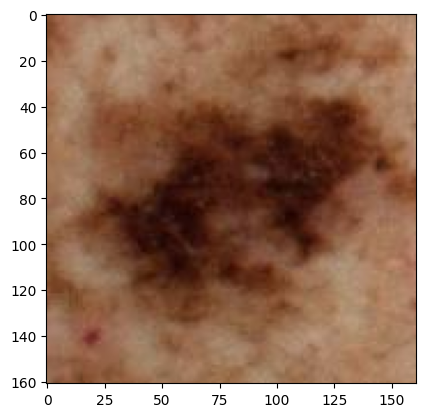

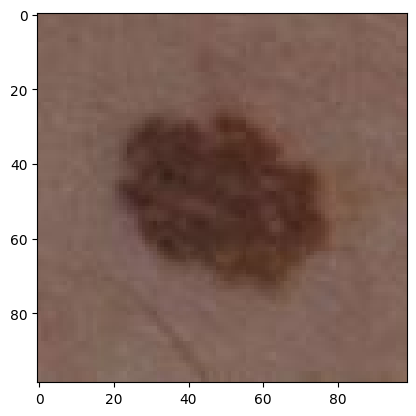

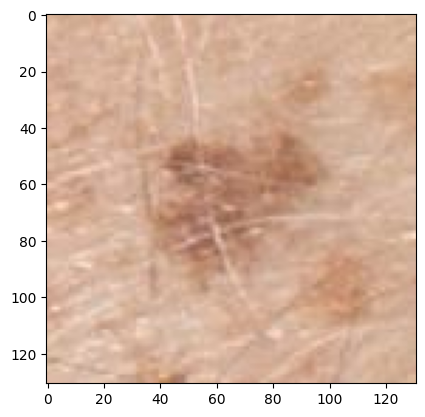

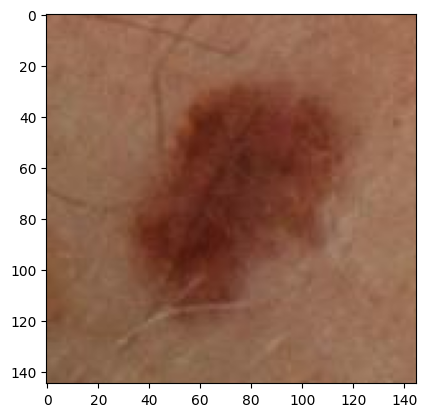

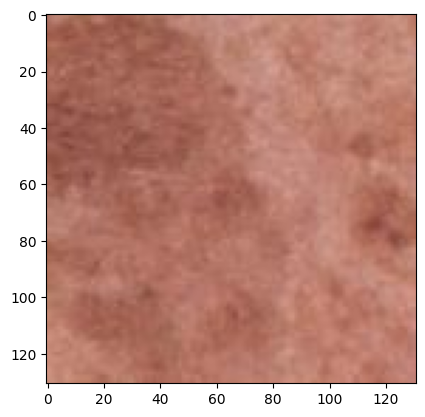

Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, Superficial spreading
count: 10


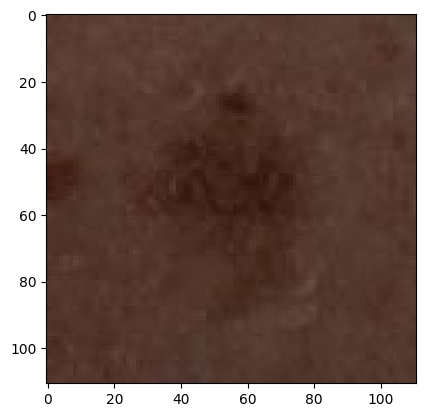

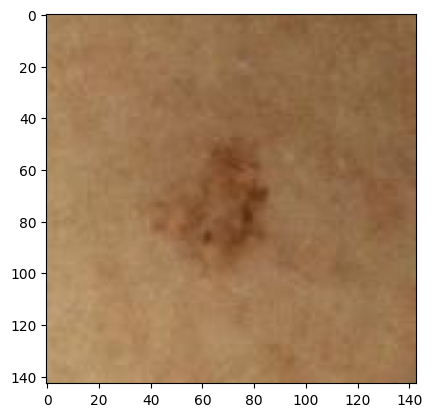

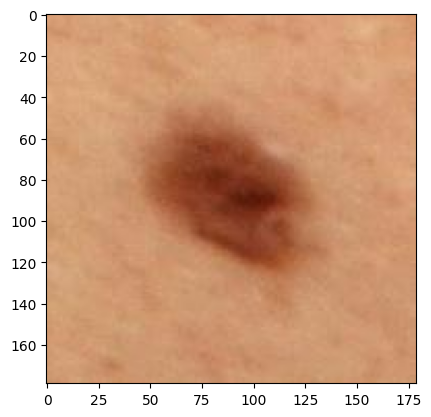

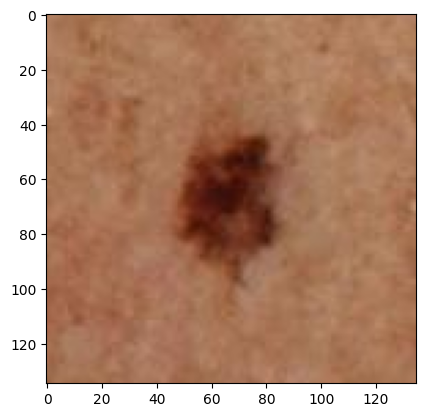

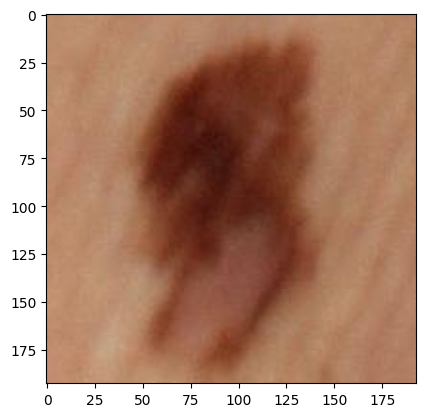

Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, associated with a nevus
count: 12


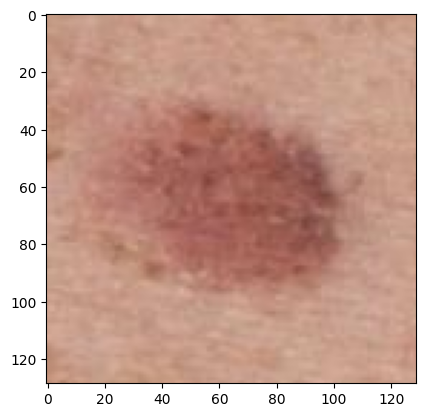

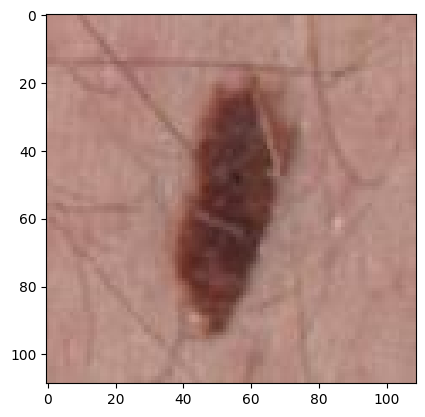

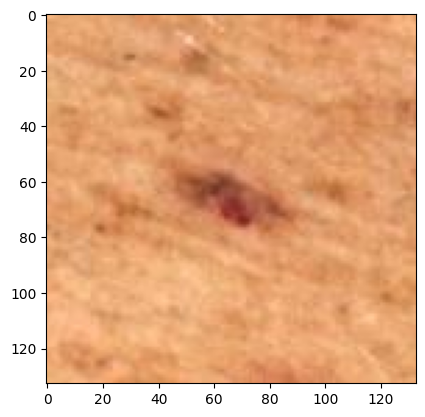

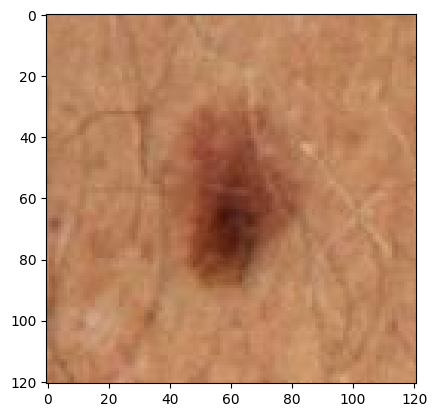

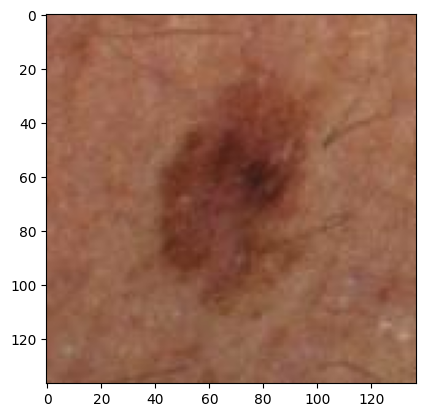

Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma metastasis
count: 1


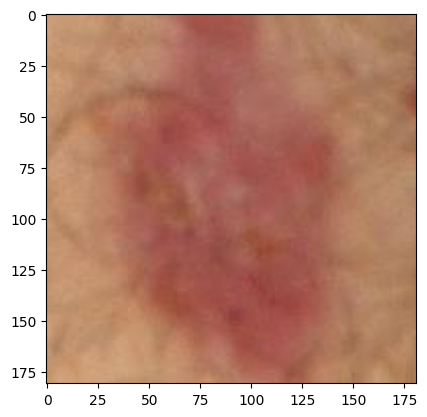

Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma, NOS
count: 13


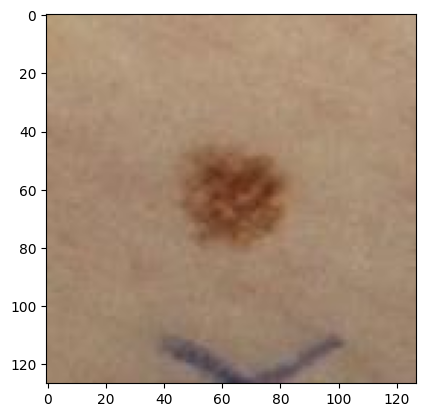

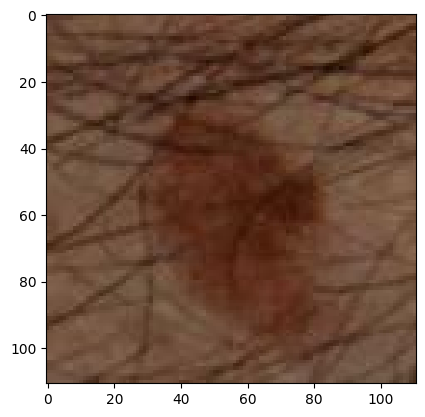

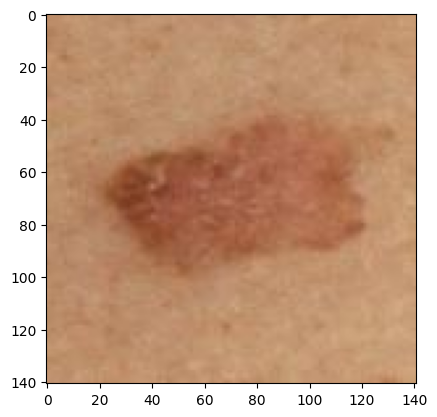

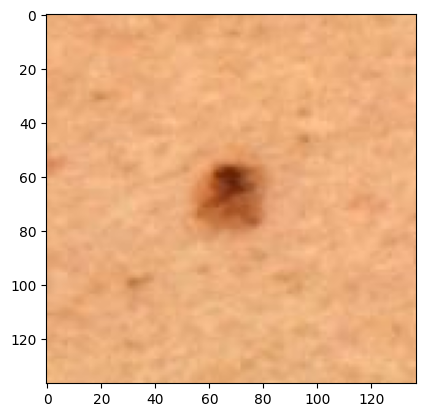

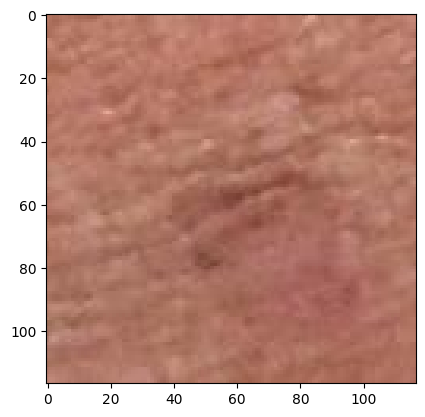

In [13]:
for iddx in sorted(df_positive["iddx_full"].unique().tolist())[15:20]:
    tmp = df_positive[df_positive["iddx_full"] == iddx]
    print("==="*20)
    print(iddx)
    print("count:", len(tmp))
    if len(tmp) > 5:
        image_id_list = tmp.sample(5)["isic_id"].values
    else:
        image_id_list = tmp["isic_id"].values
    for image_id in image_id_list:
        image_path = get_train_file_path(image_id)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()